In [1]:
source /soft/ciao/bin/ciao.bash

CIAO configuration is complete... 
CIAO 4.9 Friday, December  2, 2016
  bindir      : /soft/ciao-4.9/bin
  CALDB       : 4.7.7


In [2]:
/bin/rm -rf 20860
/bin/rm -rf 20861

In [3]:
download_chandra_obsid  20860,20861 evt2,asol,bpix,msk,flt,stat,dtf,fov


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits       16 Mb  ####################          < 1 s  89033.5 kb/s
  asol     fits       18 Mb  ####################          < 1 s  96450.9 kb/s
  bpix     fits       64 Kb  ####################          < 1 s  7120.9 kb/s
  fov      fits        5 Kb  ####################          < 1 s  829.1 kb/s
  stat     fits        2 Mb  ####################          < 1 s  34502.6 kb/s
  flt      fits        6 Kb  ####################          < 1 s  946.2 kb/s
  msk      fits        5 Kb  ####################          < 1 s  819.1 kb/s

      Total download size for ObsId 20860 = 36 Mb
      Total download time for ObsId 20860 = < 1 s


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt2     fits        5 Mb  #########

> Note:  We usually recommend reproecessing data, but I'll start from the archived files

In [4]:
ls */primary/*evt*

20860/primary/acisf20860N001_evt2.fits.gz
20861/primary/acisf20861N001_evt2.fits.gz


In [5]:
dmkeypar 20860/primary/acisf20860N001_evt2.fits.gz ontime echo+
dmkeypar 20861/primary/acisf20861N001_evt2.fits.gz ontime echo+

75066.016997457
25068.737654686


> Okay, 20860 is longer so I'll use that as the reference dataset and align 20861 to it.

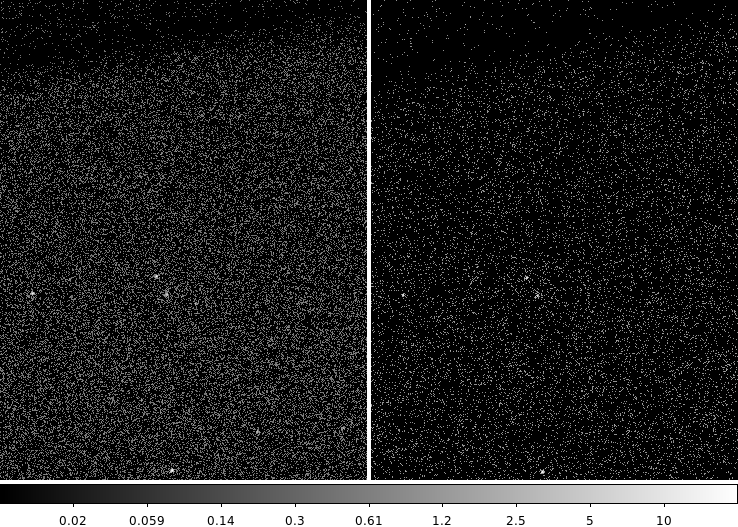

In [6]:
ds9 -log 20860/primary/acisf20860N001_evt2.fits.gz -log 20861/primary/acisf20861N001_evt2.fits.gz -match frame wcs \
  -saveimage png ds9_01.png

display < ds9_01.png

## Run wavdetect on 20860

In [7]:
fluximage 20860/primary/acisf20860N001_evt2.fits.gz 20860/image bin=1 mode=h clob+ band=broad

Running fluximage
Version: 12 September 2016

Using CSC ACIS broad science energy band.
Aspect solution 20860/primary/pcadf628653496N001_asol1.fits found.
Bad-pixel file 20860/primary/acisf20860_000N001_bpix1.fits.gz found.
Mask file 20860/secondary/acisf20860_000N001_msk1.fits found.

The output images will have 2681 by 2634 pixels, pixel size of 0.492 arcsec,
    and cover x=2046.5:4727.5:1,y=2782.5:5416.5:1.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 20860
# DMCOPY (CIAO 4.9): WARNING: Creating large image: 56 MB. Current max set at 50 MB.
Increase maximum using [opt mem=n] or increase blocking to reduce size.
Creating 4 instrument maps for obsid 20860
Creating 4 exposure maps for obsid 20860
Combining 4 exposure maps for obsid 20860
Thresholding data for obsid 20860
Exposure-correcting image for obsid 20860

The following files were created:

 The clipped counts image is:
     20860/image_broad_thresh.img

 The clipped exposure map is:
     2

In [8]:
mkpsfmap 20860/image_broad_thresh.img 20860/image_broad_thresh.psfmap energy=2.3 ecf=0.9 mode=h clob+

In [9]:
punlearn wavdetect

wavdetect \
  infile=20860/image_broad_thresh.img \
  psffile=20860/image_broad_thresh.psfmap \
  expfile=20860/image_broad_thresh.expmap \
  scales="1 2 4 6 8 12 16 24 32" \
  outfile=20860/image_broad.src \
  scell=20860/image_broad.cell \
  imagefile=20860/image_broad.recon \
  defnbkg=20860/image_broad.nbkg \
  interdir=./ mode=h clob+

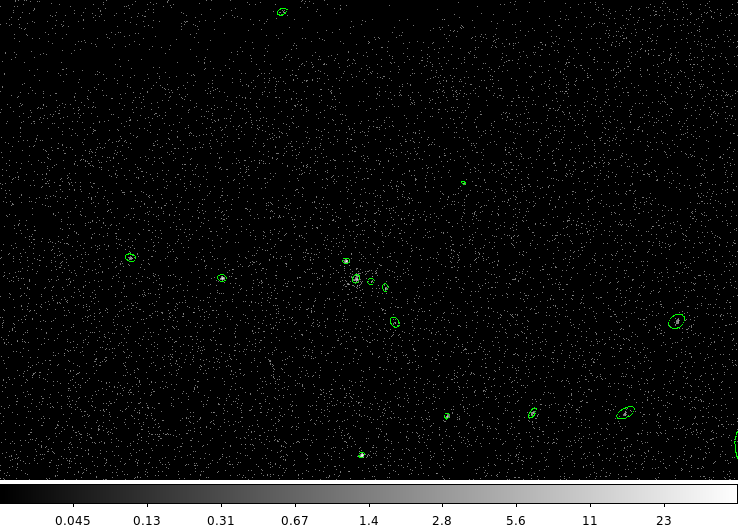

In [10]:
ds9 20860/image_broad_thresh.img -log -region 20860/image_broad.src \
  -pan to 4096 4096 physical -saveimage png ds9_02.png 

display < ds9_02.png

## Run wavdetect on 20861

In [11]:
fluximage 20861/primary/acisf20861N001_evt2.fits.gz 20861/image bin=1 mode=h clob+ band=broad

Running fluximage
Version: 12 September 2016

Using CSC ACIS broad science energy band.
Aspect solution 20861/primary/pcadf628945276N001_asol1.fits found.
Bad-pixel file 20861/primary/acisf20861_000N001_bpix1.fits.gz found.
Mask file 20861/secondary/acisf20861_000N001_msk1.fits found.

The output images will have 2720 by 2688 pixels, pixel size of 0.492 arcsec,
    and cover x=2024.5:4744.5:1,y=2717.5:5405.5:1.

Running tasks in parallel with 4 processors.
Creating aspect histograms for obsid 20861
# DMCOPY (CIAO 4.9): WARNING: Creating large image: 58 MB. Current max set at 50 MB.
Increase maximum using [opt mem=n] or increase blocking to reduce size.
Creating 4 instrument maps for obsid 20861
Creating 4 exposure maps for obsid 20861
Combining 4 exposure maps for obsid 20861
Thresholding data for obsid 20861
Exposure-correcting image for obsid 20861

The following files were created:

 The clipped counts image is:
     20861/image_broad_thresh.img

 The clipped exposure map is:
     2

In [12]:
mkpsfmap 20861/image_broad_thresh.img 20861/image_broad_thresh.psfmap energy=2.3 ecf=0.9 mode=h clob+

In [13]:
punlearn wavdetect

wavdetect \
  infile=20861/image_broad_thresh.img \
  psffile=20861/image_broad_thresh.psfmap \
  expfile=20861/image_broad_thresh.expmap \
  scales="1 2 4 6 8 12 16 24 32" \
  outfile=20861/image_broad.src \
  scell=20861/image_broad.cell \
  imagefile=20861/image_broad.recon \
  defnbkg=20861/image_broad.nbkg \
  interdir=./ mode=h clob+

## Use `wcs_match`

First try blindly on wavdetect outputs

In [14]:
wcs_match \
  infile=20861/image_broad.src \
  refsrcfile=20860/image_broad.src \
  outfile=junk.xform \
  wcsfile=20860/image_broad_thresh.img \
  method=trans \
  mode=h clob+ verb=2

 input (dup) src file : 20861/image_broad.src
 input ref src file   : 20860/image_broad.src
 input wcsfile        : 20860/image_broad_thresh.img
 debug level          : 2

Opening wcsfile:  20860/image_broad_thresh.img
asp values from 20860/image_broad_thresh.img are:   197.447   -23.378     0.000
ref WCS values are: 
 wcrpix 	 4096.500	 4096.500 
 wcrval 	  197.447	   -23.378 
 wcdlt  	 -0.00013667	  0.00013667
xfmTableFilename is:  junk.xform
radius in arcsec, radius in sky pixels are:    12.000    24.390
residlim in arcsec, residlim in sky pixels are:     2.000     4.065
Opened dup srcs file:  20861/image_broad.src

Opened ref srcs file:  20860/image_broad.src

28 common sources found between: 
20860/image_broad.src
20861/image_broad.src
After deleting poor matches, 28 sources remain
Transform elements are:
	delta_x(sky pix):  1.864259
	delta_y(sky pix):  1.935625
	rotation(deg.):    0.000000
	scale factor:      1.000000

Source Residuals
----------------
 Ref#  Dup#    Ref RA      

In [15]:
dmkeypar junk.xform t1 echo+
dmkeypar junk.xform t2 echo+

0.785819492153678
1.26131669320146


> That's somewhat reasonable.  But let's try again with a few parameter tweaks

In [16]:
wcs_match \
  infile=20861/image_broad.src"[(x,y)=circle(4096,4096,500)]" \
  refsrcfile=20860/image_broad.src"[(x,y)=circle(4096,4096,500)]" \
  outfile=out.xform \
  wcsfile=20860/image_broad_thresh.img \
  method=trans \
  radius=4 \
  mode=h clob+ verb=2 

 input (dup) src file : 20861/image_broad.src[(x,y)=circle(4096,4096,500)]
 input ref src file   : 20860/image_broad.src[(x,y)=circle(4096,4096,500)]
 input wcsfile        : 20860/image_broad_thresh.img
 debug level          : 2

Opening wcsfile:  20860/image_broad_thresh.img
asp values from 20860/image_broad_thresh.img are:   197.447   -23.378     0.000
ref WCS values are: 
 wcrpix 	 4096.500	 4096.500 
 wcrval 	  197.447	   -23.378 
 wcdlt  	 -0.00013667	  0.00013667
xfmTableFilename is:  out.xform
radius in arcsec, radius in sky pixels are:     4.000     8.130
residlim in arcsec, residlim in sky pixels are:     2.000     4.065
Opened dup srcs file:  20861/image_broad.src[(x,y)=circle(4096,4096,500)]

Opened ref srcs file:  20860/image_broad.src[(x,y)=circle(4096,4096,500)]

11 common sources found between: 
20860/image_broad.src[(x,y)=circle(4096,4096,500)]
20861/image_broad.src[(x,y)=circle(4096,4096,500)]
After deleting poor matches, 11 sources remain
Transform elements are:
	delt

In [17]:
dmkeypar out.xform t1 echo+
dmkeypar out.xform t2 echo+

0.411586576315999
1.4250974170776


> Okay, so this x-match looks reasonable: dX = 0.412 pixels and dY = 1.43 pixels.

## Apply offsets to 20861



In [18]:
/bin/ls 20861/primary/pcad*


20861/primary/pcadf628945276N001_asol1.fits.gz


In [19]:
wcs_update \
  infile=20861/primary/pcadf628945276N001_asol1.fits.gz \
  outfile=20861/primary/pcadf628945276N001_corrected_asol1.fits \
  transformfile=out.xform \
  wcsfile=20860/image_broad_thresh.img \
  mode=h clob+


In [20]:
dmdiff \
  20861/primary/pcadf628945276N001_asol1.fits.gz"[#row=1:5]" \
  20861/primary/pcadf628945276N001_corrected_asol1.fits"[#row=1:5]"

Infile 1:  20861/primary/pcadf628945276N001_asol1.fits.gz[#row=1:5]
Infile 2:  20861/primary/pcadf628945276N001_corrected_asol1.fits[#row=1:5]

-----------------------
HEADER VALUE DIFFERENCES
-----------------------


Message:                                Keyword:              Value(s):                    Diff:
--------                                 -------              ---------                    -----
Values are not equal                    CHECKSUM MqEGMnBDMnBDMnBD  YA6eZ55bYA5bY55b
# dmdiff (CIAO 4.9): WARNING: CHECKSUM comments are different.
# dmdiff (CIAO 4.9):   comment1= "HDU checksum updated 2017-12-07T05:35:29"
# dmdiff (CIAO 4.9):   comment2= "HDU checksum updated 2018-01-18T13:52:09"
Values are not equal                     DATASUM        639100382  986717110       
# dmdiff (CIAO 4.9): WARNING: DATASUM comments are different.
# dmdiff (CIAO 4.9):   comment1= "data unit checksum updated 2017-12-07T05:34:50"
# dmdiff (CIAO 4.9):   comment2= "data unit checksum updated

> Looks reasonable

## Now apply correction to event2 file

In [21]:
dmcopy 20861/primary/acisf20861N001_evt2.fits.gz 20861/primary/acisf20861N001_corrected_evt2.fits mode=h clob+ op=all

In [22]:
wcs_update \
  infile=20861/primary/acisf20861N001_corrected_evt2.fits \
  outfile= \
  transformfile=out.xform \
  wcsfile=20860/image_broad_thresh.img \
  mode=h clob+

In [23]:
dmdiff \
  20861/primary/acisf20861N001_evt2.fits.gz \
  20861/primary/acisf20861N001_corrected_evt2.fits 

Infile 1:  20861/primary/acisf20861N001_evt2.fits.gz
Infile 2:  20861/primary/acisf20861N001_corrected_evt2.fits

-----------------------
HEADER VALUE DIFFERENCES
-----------------------


Message:                                Keyword:              Value(s):                    Diff:
--------                                 -------              ---------                    -----
Values are not equal                    CHECKSUM AGmCAGlCAGlCAGlC  4mNN7lKL4lKL4lKL
# dmdiff (CIAO 4.9): WARNING: CHECKSUM comments are different.
# dmdiff (CIAO 4.9):   comment1= "HDU checksum updated 2017-12-07T05:46:34"
# dmdiff (CIAO 4.9):   comment2= "HDU checksum updated 2018-01-18T13:53:20"
# dmdiff (CIAO 4.9): WARNING: DATASUM comments are different.
# dmdiff (CIAO 4.9):   comment1= "data unit checksum updated 2017-12-07T05:46:23"
# dmdiff (CIAO 4.9):   comment2= "data unit checksum updated 2018-01-18T13:53:19"
Values are not equal                      RA_PNT  197.44641451566  197.4463532362   -6.12795

### Update `ASOLFILE` keyword in modified file

In [24]:
dmhedit 20861/primary/acisf20861N001_corrected_evt2.fits file= op=add key=ASOLFILE value=pcadf628945276N001_corrected_asol1.fits
dmkeypar 20861/primary/acisf20861N001_corrected_evt2.fits ASOLFILE echo+

pcadf628945276N001_corrected_asol1.fits


In [25]:
ds9 -log 20860/primary/acisf20860N001_evt2.fits.gz -log 20861/primary/acisf20861N001_corrected_evt2.fits \
  -match frame wcs 

## Now run `merge_obs`

Actually let me start with just running `reproject_obs` which just combines the event files.


In [26]:
reproject_obs \
  infile=20860/primary/acisf20860N001_evt2.fits.gz,20861/primary/acisf20861N001_corrected_evt2.fits \
  outroot=merge \
  mode=h clob+ verb=1

Running reproject_obs
Version: 31 March 2017

Verifying 2 observations.
Calculating new tangent point.
New tangent point: RA=13h 9m 47.184s Dec=-23d 22' 38.64"

Observations to be reprojected:

  Obsid  Obs Date   Exp    DETNAM     SIM_Z    FP   Sepn   PA  
                   (ks)                (mm)    (K)   (')  (deg)
---------------------------------------------------------------
1 20860 2017-12-03  74.1 ACIS-2367   -190.140 153.4   0.1  +167
2 20861 2017-12-06  24.7 ACIS-2367   -190.143 156.0   0.1   -13

Running tasks in parallel with 4 processors.
Reprojecting 2 event files to a common tangent point.
Merging reprojected events files to merge_merged_evt.fits

The following files were created:

The reprojected event files:
     merge_20860_reproj_evt.fits
     merge_20861_reproj_evt.fits

The merged event file:
     merge_merged_evt.fits

   should not be used to create ARF/RMF/exposure maps because
      the RA_NOM keyword varies by 0.000523539379998 (limit is 0.0003)
      the DE

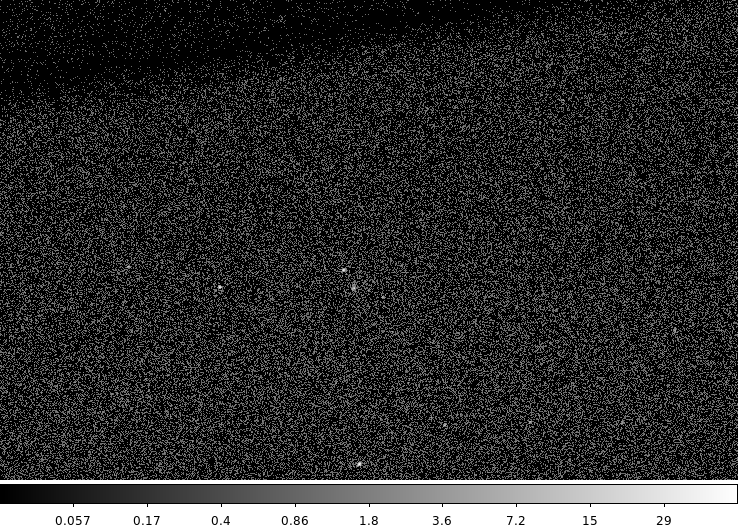

In [27]:
ds9 merge_merged_evt.fits -log -saveimage png ds9_fin.png 
display < ds9_fin.png

## Okay, now go with `merge_obs`

In [28]:
merge_obs \
  infile=20860/primary/acisf20860N001_evt2.fits.gz,20861/primary/acisf20861N001_corrected_evt2.fits \
  outroot=merge \
  band=broad bin=1 \
  mode=h clob+ verb=1

Running merge_obs
Version: 12 September 2016

Verifying 2 observations.
Using CSC ACIS broad science energy band.
Calculating new tangent point.
New tangent point: RA=13h 9m 47.184s Dec=-23d 22' 38.64"

Observations to be reprojected:

  Obsid  Obs Date   Exp    DETNAM     SIM_Z    FP   Sepn   PA  
                   (ks)                (mm)    (K)   (')  (deg)
---------------------------------------------------------------
1 20860 2017-12-03  74.1 ACIS-2367   -190.140 153.4   0.1  +167
2 20861 2017-12-06  24.7 ACIS-2367   -190.143 156.0   0.1   -13

Running tasks in parallel with 4 processors.
Reprojecting 2 event files to a common tangent point.
Merging reprojected events files to merge_merged_evt.fits

Calculating the output grid

The merged images will have 2720 by 2688 pixels, a pixel size of 0.492 arcsec,
    and cover x=2026.5:4746.5:1, y=2724.5:5412.5:1.

Creating the fluxed images for 2 observations in parallel.
Creating aspect histograms for obsid 20860
# DMCOPY (CIAO 4.9): W

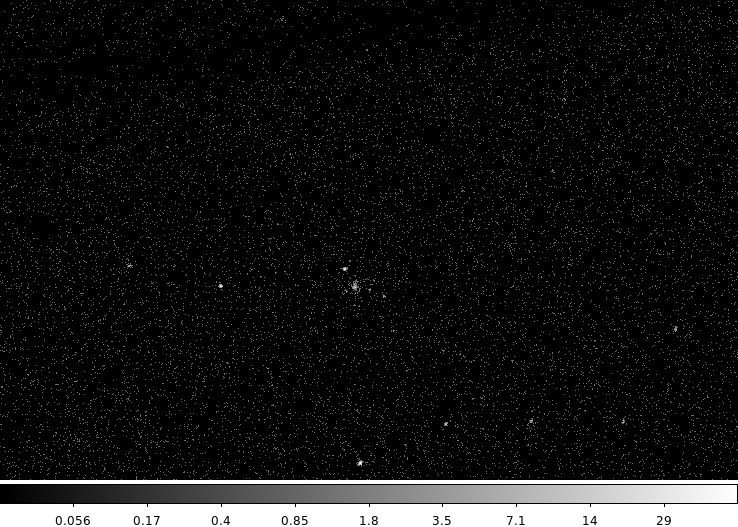

In [29]:
ds9 merge_broad_thresh.img -log -pan to 4096 4096 physical -saveimage png ds9_merged.png 
display < ds9_merged.png

> Looks good.